# EDA ON GLOBAL TERRORISM DATA
---


<a href='https://public.tableau.com/views/WorldTerorismAnalysis/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link' target='_blank'> ![title](terror.png) </a>

- Data Inspection
- Inspecting Features and Identifying the most relevant for exploration
- all other Processes are detailed on the go 

<a href='https://public.tableau.com/views/WorldTerorismAnalysis/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link' target='_blank'>Click the image above or here to Check out the Tableau Interactive Visualization for this Analysis</a>

## Importing packages  

In [1]:
# importing relevant packages
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Importing the Dataset 

In [2]:
# Importing the dataset for analysis 
raw_data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = "latin1")
raw_data.head()
 # the dataset is encoded beyond the default uts-8 so we use any of the following: 'latin1', 'ISO-8859-1', or 'cp1252'.

C:\Users\user\AppData\Local\Temp\ipykernel_10396\1319403986.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = "latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Data Inspection 
- understanding the structure of the data, 
- checking for missing values 
- examining the datatypes and handling cardinality issue 

In [3]:
raw_data.copy()
raw_data.shape

(181691, 135)

In [4]:
raw_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#checking for Missing values 
null_values = raw_data.isnull().sum().sort_values(ascending=False)
null_values.head(20)

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
claimmode3          181558
claimmode3_txt      181558
gsubname2           181531
claim3              181373
guncertain3         181371
gname3              181367
divert              181367
attacktype3         181263
attacktype3_txt     181263
ransomnote          181179
ransompaidus        181139
ransomamtus         181128
claimmode2          181075
claimmode2_txt      181075
ransompaid          180917
dtype: int64

In [6]:
# checking for features with morethan 50% missing data
fifty_percent_data_missed = raw_data.shape[0]*0.5
null_values[null_values>(fifty_percent_data_missed)].shape

(77,)

**Checking for High Cardinality**
- cardinality refers to the number of unique values in a column or feature of a dataset. It is a measure of the diversity of values in a dataset and can be used to identify categorical variables.
- High cardinality features can lead to overfitting and slow model training times, while low cardinality features can lead to underfitting and poor model performance


In [7]:
#checking for high cardinality data and inspecting them   
raw_data.nunique().sort_values(ascending=False).head(10)

eventid      181691
summary      112492
target1       86005
scite1        83988
scite2        62263
latitude      48322
longitude     48039
location      44109
city          36673
scite3        36090
dtype: int64

Here, we further investigate the high cardinality datasset based on their data type, to see if there is any reason to used them in this analysis

In [9]:
# Dealing with high cardinality issue
int_cardinality = raw_data.select_dtypes("int").nunique().sort_values(ascending=False)
float_cardinality = raw_data.select_dtypes("float").nunique().sort_values(ascending=False)
print(
"the cardinality of INTERGER FEATURES","\n",
int_cardinality.head(),"\n\n",
    "--"*50,"\n\n",
"cardinality of FLOAT FEATURES","\n",
float_cardinality.head()
)

the cardinality of INTERGER FEATURES 
 eventid      181691
country         205
iyear            47
iday             32
targtype1        22
dtype: int64 

 ---------------------------------------------------------------------------------------------------- 

 cardinality of FLOAT FEATURES 
 latitude     48322
longitude    48039
propvalue      659
ransomamt      429
ndays          328
dtype: int64


In [10]:
raw_data.isnull().sum().sort_values().tail(10)

guncertain3         181371
claim3              181373
gsubname2           181531
claimmode3_txt      181558
claimmode3          181558
weaptype4_txt       181618
weaptype4           181618
weapsubtype4        181621
weapsubtype4_txt    181621
gsubname3           181671
dtype: int64

## Features inspection and selection 
**dropping features with morethan 50% missing data:**
we will drop this features for the following reasons:
- Limited Information Gain: Features with a substantial amount of missing data may not contribute much useful information to the analysis. If a feature has more missing values than present values, its ability to provide meaningful insights may be limited.

- Computational Efficiency: Dropping features with a high percentage of missing values can simplify the analysis and reduce the computational load.

- Avoiding Bias in Imputation: Imputing missing values introduces assumptions about the distribution of the data. If a large portion of a feature's values is missing, imputing them might lead to biased or inaccurate results.


In [11]:
df = raw_data.copy()

we will start the cleaning by dropping features with morethan 50% missing values

In [12]:
df.duplicated().sum()

0

In [13]:
#dropping feature with high desity of missing values
features_with_morethan_50_percent_missing_values = null_values[null_values>(df.shape[0]*0.5)].index
df.drop(columns=features_with_morethan_50_percent_missing_values, inplace=True)

#dropping a high cardinal integer
df.drop(columns="eventid", inplace=True)
df.shape

(181691, 57)

In [14]:
#Checking for missing values
missing_vals = df.isnull().sum().sort_values(ascending=False)
missing_vals[missing_vals>0]

nperps              71115
nperpcap            69489
nwoundte            69143
weapdetail          67670
nkillter            66958
scite1              66191
summary             66129
claimed             66120
nwoundus            64702
nkillus             64446
corp1               42552
weapsubtype1_txt    20768
weapsubtype1        20768
nwound              16311
targsubtype1_txt    10373
targsubtype1        10373
nkill               10313
longitude            4557
latitude             4556
natlty1_txt          1559
natlty1              1559
target1               638
city                  435
provstate             421
guncertain1           380
ishostkid             178
specificity             6
doubtterr               1
multiple                1
dtype: int64

### Comparing the features with higher missing values vs their cardinality 
- here We want to drop all features with large missing values and high cardinality 

In [15]:
# comparing the number of unique values with missing value
for i in missing_vals.index:
    print(i, df[i].nunique())

nperps 113
nperpcap 50
nwoundte 44
weapdetail 19148
nkillter 96
scite1 83988
summary 112492
claimed 3
nwoundus 44
nkillus 31
corp1 33237
weapsubtype1_txt 30
weapsubtype1 30
nwound 238
targsubtype1_txt 112
targsubtype1 112
nkill 205
longitude 48039
latitude 48322
natlty1_txt 215
natlty1 215
target1 86005
city 36673
provstate 2855
guncertain1 2
ishostkid 3
specificity 5
doubtterr 3
multiple 2
weaptype1_txt 12
INT_LOG 3
dbsource 26
weaptype1 12
property 3
INT_MISC 3
INT_IDEO 3
iyear 47
individual 2
gname 3537
iday 32
extended 2
country 205
country_txt 205
region 12
region_txt 12
vicinity 3
crit1 2
crit2 2
crit3 2
success 2
suicide 2
attacktype1 9
attacktype1_txt 9
targtype1 22
targtype1_txt 22
imonth 13
INT_ANY 3


### Checking the Missing values by data type 
- Checking for missing values with respect to datatypes this will be very vital when resolving the missing value issue

In [16]:
# Checking missing values in integer dtype only
df.select_dtypes("int").isnull().sum()

iyear          0
imonth         0
iday           0
extended       0
country        0
region         0
vicinity       0
crit1          0
crit2          0
crit3          0
success        0
suicide        0
attacktype1    0
targtype1      0
individual     0
weaptype1      0
property       0
INT_LOG        0
INT_IDEO       0
INT_MISC       0
INT_ANY        0
dtype: int64

In [17]:
# Checking missing in float dtype
df.select_dtypes("float").isnull().sum()

latitude         4556
longitude        4557
specificity         6
doubtterr           1
multiple            1
targsubtype1    10373
natlty1          1559
guncertain1       380
nperps          71115
nperpcap        69489
claimed         66120
weapsubtype1    20768
nkill           10313
nkillus         64446
nkillter        66958
nwound          16311
nwoundus        64702
nwoundte        69143
ishostkid         178
dtype: int64

In [18]:
### Filling the missing values in fileds

In [19]:
# handling missing values features with less than 100 missing val
mean_replacer = df[["specificity","doubtterr","multiple"]].mean()
df[["specificity","doubtterr","multiple"]] = df[["specificity","doubtterr","multiple"]].fillna(mean_replacer)

In [20]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

### Inspecting and Cleaning dates
For easy working with the date we want to convert it to proper format of datetime

In [21]:
print("DAYS",
df["iday"].unique(),"\n\n",
      "MONTHS",
df["imonth"].unique(),"\n\n",
      "YEARS",
df["iyear"].unique()
     )

DAYS [ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29] 

 MONTHS [ 7  0  1  2  3  4  5  6  8  9 10 11 12] 

 YEARS [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]


In [22]:
# from this, the value 0 is unrealistic. hence looking at the data it is highly probable that 0 refers to 31st day of the month 
df["iday"].value_counts().sort_values(ascending = False)

iday
15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      891
Name: count, dtype: int64

In [23]:
df["imonth"].value_counts()

imonth
5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: count, dtype: int64

**We Visualize the Date to see if pattern exists in the Days, Months or Years** 

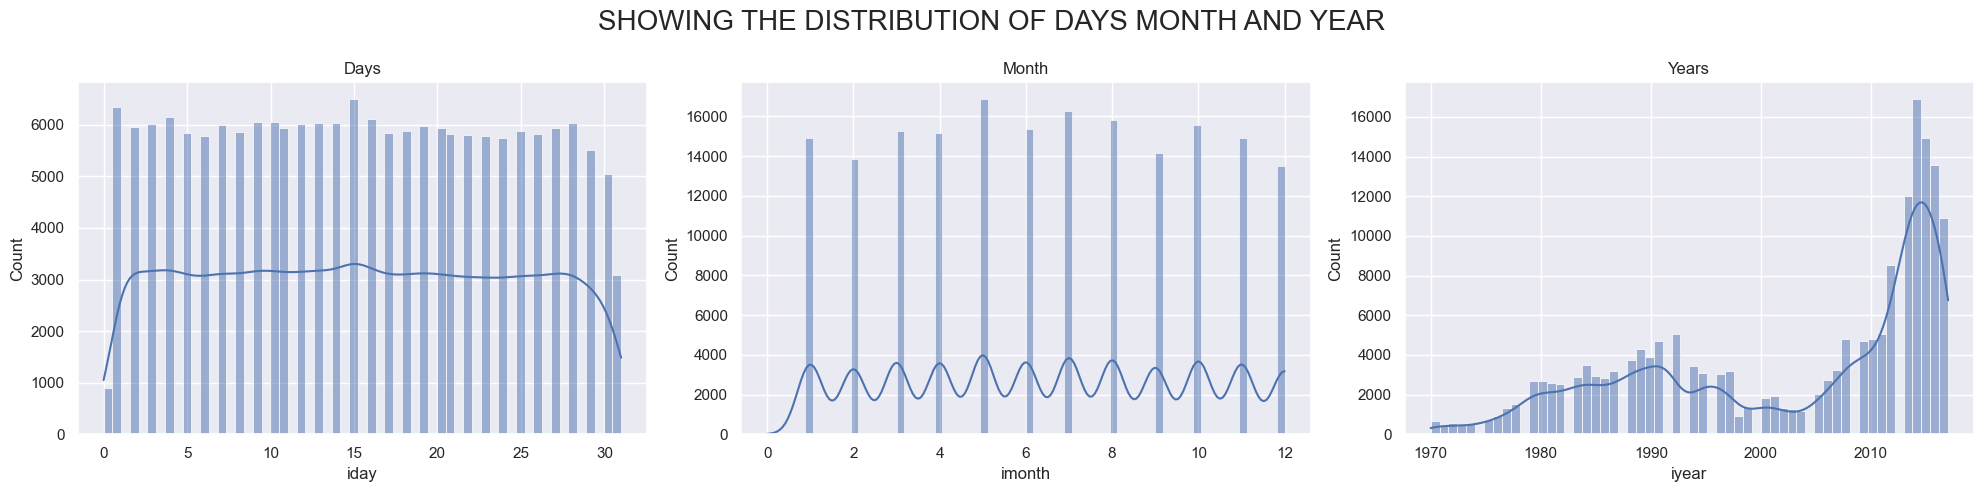

In [24]:
# ploting the date elements by frequency to check for significance 
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,5))

plt.suptitle("SHOWING THE DISTRIBUTION OF DAYS MONTH AND YEAR", fontsize=20)

# The Subplots
sns.histplot(data=df['iday'], ax=axes[0], kde=True)
axes[0].set_title('Days')

sns.histplot(data=df['imonth'], ax=axes[1], kde=True)
axes[1].set_title('Month')

sns.histplot(data=df['iyear'], ax=axes[2], kde=True)
axes[2].set_title('Years')

plt.tight_layout()
plt.show()

The data shows that days and months starts from 0 to 31st and 12 respectively while the year starts from 1970. But looking at the chart above the details suggests that days and months has a low variability. from the graph we have good reason to believe that 0 in days meant 31st day of the month while in months it meanth to be 12. 

In [25]:
# Replacing 0 with value 31st in days and 12 in months
df["iday"] = df["iday"].replace({0:31})
df["imonth"] = df["imonth"].replace({0:12})

In [26]:
# Renaming the day, month and year values
df['day'] = df['iday']
df['month'] = df['imonth']
df['year'] = df['iyear']

# coverting them to datetime data type
df["date"] =pd.to_datetime(df[["day","month","year"]], errors="coerce")

# Dropping the old values 
df = df.drop(columns = ["iday","imonth","iyear","day","month","year"])

df["date"].head()

0   1970-07-02
1   1970-12-31
2   1970-01-31
3   1970-01-31
4   1970-01-31
Name: date, dtype: datetime64[ns]

In [27]:
# dropping all undocumented values
df_shape_before = df.shape
df = df.dropna(subset = ["date"])

In [28]:
print ("CHECKING THE SIZE OF DATA REMOVED","\n","-"*35,"\n",
"Data size before = ", df_shape_before[0],"observation",'\n'
"Data size after = ", df.shape[0], "observation",'\n',
df_shape_before[0] - df.shape[0], "Observations Removed, which is ", round(((df_shape_before[0] - df.shape[0])/df_shape_before[0])*100,3), "percent of the total data"
)

CHECKING THE SIZE OF DATA REMOVED 
 ----------------------------------- 
 Data size before =  181691 observation 
Data size after =  181320 observation 
 371 Observations Removed, which is  0.204 percent of the total data


### Inspecting and Cleaning Geospatial-data 
** Cleaning the Location Data Seperately will help us in dealing with leacky features i.e. features that gives almost the same information this can lead to high correlation between the datasets and also lead to overfitting **

In [29]:
df_location = df[['country', 'country_txt','region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude']]

In [30]:
df_location.isnull().sum()

country           0
country_txt       0
region            0
region_txt        0
provstate       418
city            435
latitude       4514
longitude      4515
dtype: int64

In [31]:
df_location[['country','country_txt']].groupby(by="country_txt").count().sort_values(by="country").tail(20)

,country
country_txt,
Egypt,2479
France,2673
Algeria,2729
United States,2829
Sri Lanka,3001
Spain,3237
Yemen,3345
Thailand,3845
Nigeria,3907


### Removing encoded fields


most of the numerical data are the encoded values of the categorical data in the dataset. for the purpose of exploration we will drop them since there wounld not necessarily be any modelling involve

In [32]:
df.columns

Index(['extended', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity',
       'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1', 'natlty1_txt', 'gname', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus',
       'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'ishostkid',
       'scite1', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY',
       'date'],
      dtype='object')

In [33]:
df = df[['country_txt','region_txt','city', 'latitude', 'longitude','summary',"targtype1_txt",
    'attacktype1_txt','natlty1_txt','weaptype1_txt', 'weapdetail', 'nkill','nwound','scite1','dbsource',"date"]]

In [34]:
df.shape

(181320, 16)

In [35]:
df.isnull().sum().sort_values()

country_txt            0
region_txt             0
targtype1_txt          0
attacktype1_txt        0
weaptype1_txt          0
dbsource               0
date                   0
city                 435
natlty1_txt         1552
latitude            4514
longitude           4515
nkill              10243
nwound             16237
summary            65861
scite1             65923
weapdetail         67556
dtype: int64

In [36]:
df.head()


,country_txt,region_txt,city,latitude,longitude,summary,targtype1_txt,attacktype1_txt,natlty1_txt,weaptype1_txt,weapdetail,nkill,nwound,scite1,dbsource,date
0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,Private Citizens & Property,Assassination,Dominican Republic,Unknown,NaN,1.0,0.0,NaN,PGIS,1970-07-02
1,Mexico,North America,Mexico city,19.371887,-99.086624,NaN,Government (Diplomatic),Hostage Taking (Kidnapping),Belgium,Unknown,NaN,0.0,0.0,NaN,PGIS,1970-12-31
2,Philippines,Southeast Asia,Unknown,15.478598,120.599741,NaN,Journalists & Media,Assassination,United States,Unknown,NaN,1.0,0.0,NaN,PGIS,1970-01-31
3,Greece,Western Europe,Athens,37.997490,23.762728,NaN,Government (Diplomatic),Bombing/Explosion,United States,Explosives,Explosive,NaN,NaN,NaN,PGIS,1970-01-31
4,Japan,East Asia,Fukouka,33.580412,130.396361,NaN,Government (Diplomatic),Facility/Infrastructure Attack,United States,Incendiary,Incendiary,NaN,NaN,NaN,PGIS,1970-01-31


In [37]:
df["attacktype1_txt"].value_counts()

attacktype1_txt
Bombing/Explosion                      88105
Armed Assault                          42627
Assassination                          19254
Hostage Taking (Kidnapping)            11103
Facility/Infrastructure Attack         10323
Unknown                                 7250
Unarmed Assault                         1012
Hostage Taking (Barricade Incident)      990
Hijacking                                656
Name: count, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181320 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   country_txt      181320 non-null  object        
 1   region_txt       181320 non-null  object        
 2   city             180885 non-null  object        
 3   latitude         176806 non-null  float64       
 4   longitude        176805 non-null  float64       
 5   summary          115459 non-null  object        
 6   targtype1_txt    181320 non-null  object        
 7   attacktype1_txt  181320 non-null  object        
 8   natlty1_txt      179768 non-null  object        
 9   weaptype1_txt    181320 non-null  object        
 10  weapdetail       113764 non-null  object        
 11  nkill            171077 non-null  float64       
 12  nwound           165083 non-null  float64       
 13  scite1           115397 non-null  object        
 14  dbsource         181320 n

## Inspecting and Cleaning the features part 2 
 - Here we handle some other missing values in the data set by inspecting them one after the other  

In [39]:
df.isnull().sum()

country_txt            0
region_txt             0
city                 435
latitude            4514
longitude           4515
summary            65861
targtype1_txt          0
attacktype1_txt        0
natlty1_txt         1552
weaptype1_txt          0
weapdetail         67556
nkill              10243
nwound             16237
scite1             65923
dbsource               0
date                   0
dtype: int64

In [40]:
df["scite1"] = df["scite1"].fillna("not_pecify")

In [41]:
df["nwound"] = df["nwound"].fillna(df["nwound"].mean())

In [42]:
df["nkill"] = df["nkill"].fillna(df["nkill"].mean())

In [43]:
# there seems to be a correlation between `weapdetail and weaptype1, summary and date
df[["weapdetail","weaptype1_txt", "summary","date"]]

,weapdetail,weaptype1_txt,summary,date
0,NaN,Unknown,NaN,1970-07-02
1,NaN,Unknown,NaN,1970-12-31
2,NaN,Unknown,NaN,1970-01-31
3,Explosive,Explosives,NaN,1970-01-31
4,Incendiary,Incendiary,NaN,1970-01-31
...,...,...,...,...
181686,NaN,Firearms,12/31/2017: Assailants opened fire on a Somali...,2017-12-31
181687,Mortars were used in the attack.,Explosives,12/31/2017: Assailants launched mortars at the...,2017-12-31
181688,NaN,Incendiary,12/31/2017: Assailants set fire to houses in K...,2017-12-31
181689,A thrown grenade was used in the attack.,Explosives,12/31/2017: Assailants threw a grenade at a Fo...,2017-12-31


In [44]:
# we can see that "natlty1_txt" and "country_txt" has a perfect corelation, heance we will drop natilty1_txt
df[["natlty1_txt","country_txt"]].value_counts()

natlty1_txt  country_txt       
Iraq         Iraq                  23982
Pakistan     Pakistan              13807
India        India                 11825
Afghanistan  Afghanistan           10785
Colombia     Colombia               7867
                                   ...  
El Salvador  Panama                    1
             Peru                      1
             Spain                     1
             West Germany (FRG)        1
Austria      Colombia                  1
Name: count, Length: 2538, dtype: int64

In [45]:
#we will drop one each 
df = df.drop(columns = ["weapdetail","summary", "natlty1_txt"])

In [46]:
df.shape

(181320, 13)

In [47]:
#slicing to check for inportance 
df.iloc[2]

country_txt                Philippines
region_txt              Southeast Asia
city                           Unknown
latitude                     15.478598
longitude                   120.599741
targtype1_txt      Journalists & Media
attacktype1_txt          Assassination
weaptype1_txt                  Unknown
nkill                              1.0
nwound                             0.0
scite1                      not_pecify
dbsource                          PGIS
date               1970-01-31 00:00:00
Name: 2, dtype: object

In [48]:
df.isnull().sum()

country_txt           0
region_txt            0
city                435
latitude           4514
longitude          4515
targtype1_txt         0
attacktype1_txt       0
weaptype1_txt         0
nkill                 0
nwound                0
scite1                0
dbsource              0
date                  0
dtype: int64

In [49]:
df[df['city'].isnull()]["country_txt"].value_counts()

country_txt
Thailand        237
Afghanistan     139
Iraq             16
Pakistan         11
Indonesia         9
Algeria           7
Russia            4
Syria             4
Myanmar           3
Macedonia         1
Georgia           1
Saudi Arabia      1
Egypt             1
Libya             1
Name: count, dtype: int64

In [50]:
df[df["country_txt"]== "Thailand"]["city"].value_counts()

city
Unknown            267
Bangkok            220
Yala               136
Muang              115
Bannang Sata        68
                  ... 
Ban Klang            1
Ban Ton Phai         1
Tathong              1
Kraso                1
Ban Sawor Hilae      1
Name: count, Length: 866, dtype: int64

In [51]:
df["city"] = df["city"].fillna("Unknown")

In [52]:
df.isnull().sum()

country_txt           0
region_txt            0
city                  0
latitude           4514
longitude          4515
targtype1_txt         0
attacktype1_txt       0
weaptype1_txt         0
nkill                 0
nwound                0
scite1                0
dbsource              0
date                  0
dtype: int64

In [53]:
#now we will drop all the observation that has no values in the longiture and latitude 
df = df.dropna()

In [56]:
print (
    "before cleaning we have " , df.shape[0], "observations and ",df.shape[1]," Features","\n"
    "after cleaning we are left ", df.shape[0], "observations and ",df.shape[1]," Features"  )

before cleaning we have  176805 observations and  13  Features 
after cleaning we are left  176805 observations and  13  Features


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176805 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   country_txt      176805 non-null  object        
 1   region_txt       176805 non-null  object        
 2   city             176805 non-null  object        
 3   latitude         176805 non-null  float64       
 4   longitude        176805 non-null  float64       
 5   targtype1_txt    176805 non-null  object        
 6   attacktype1_txt  176805 non-null  object        
 7   weaptype1_txt    176805 non-null  object        
 8   nkill            176805 non-null  float64       
 9   nwound           176805 non-null  float64       
 10  scite1           176805 non-null  object        
 11  dbsource         176805 non-null  object        
 12  date             176805 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 18.9+ MB


In [58]:
df[["nkill","nwound"]] = df[["nkill","nwound"]].astype("int")

In [59]:
# Teansforming the date Values to datetime
df["Date"] = pd.to_datetime(df["date"])
df["Date"].head()

0   1970-07-02
1   1970-12-31
2   1970-01-31
3   1970-01-31
4   1970-01-31
Name: Date, dtype: datetime64[ns]

In [60]:
# Grouping the weapon types to reduce cardinality 
df["weaptype1_txt"] = df["weaptype1_txt"].replace(("Melee","Chemical","Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)","Sabotage Equipment","Biological","Biological","Fake Weapons","Radiological"),"Other")

In [61]:
#Renaming long names in the attack type fields
df["attacktype1_txt"] = df["attacktype1_txt"].replace(("Unarmed Assault","Hostage Taking (Barricade Incident)","Hijacking"),"Other")
df["attacktype1_txt"] = df["attacktype1_txt"].replace("Bombing/Explosion", "Explossive")
df["attacktype1_txt"] = df["attacktype1_txt"].replace("Hostage Taking (Kidnapping)","Hostage")
df["attacktype1_txt"] = df["attacktype1_txt"].replace("Facility/Infrastructure Attack", "facilityAttack")

In [62]:
df["dbsource"].value_counts()

dbsource
START Primary Collection                    77486
PGIS                                        59951
ISVG                                        17130
CETIS                                       15824
CAIN                                         1588
UMD Schmid 2012                              1123
Hewitt Project                               1005
UMD Algeria 2010-2012                         813
UMD South Africa                              418
UMD Sri Lanka 2011                            401
UMD Miscellaneous                             238
Anti-Abortion Project 2010                    182
Eco Project 2010                              146
UMD JTMM Nepal 2012                           104
HSI                                            97
Hyland                                         69
Hijacking DB                                   54
UMD Encyclopedia of World Terrorism 2012       43
Armenian Website                               39
CBRN Global Chronology                   

In [63]:
df["dbsource"] = df["dbsource"].replace(('CAIN',
       'UMD Schmid 2012', 'Hewitt Project', 'UMD Algeria 2010-2012',
       'UMD South Africa', 'UMD Sri Lanka 2011', 'UMD Miscellaneous',
       'Anti-Abortion Project 2010', 'Eco Project 2010', 'UMD JTMM Nepal 2012',
       'HSI', 'Hyland', 'Hijacking DB',
       'UMD Encyclopedia of World Terrorism 2012', 'Armenian Website',
       'CBRN Global Chronology', 'State Department 1997 Document',
       'UMD Assassinations Project', 'UMD Black Widows 2011',
       'Leuprecht Canadian Data', 'Disorders and Terrorism Chronology',
       'Sageman'),"Others")

In [64]:
df.shape

(176805, 14)

In [65]:
df.isnull().sum()

country_txt        0
region_txt         0
city               0
latitude           0
longitude          0
targtype1_txt      0
attacktype1_txt    0
weaptype1_txt      0
nkill              0
nwound             0
scite1             0
dbsource           0
date               0
Date               0
dtype: int64

## Exporting the cleaned data for tableau interactive visualization

In [66]:
#Exporting the cleaned dataset
# df.to_csv("data_cleaned.csv", index=False)
# print("\nData Exported successfully")

# Analysis continues with Visualization

In [67]:
data = df.copy()

In [68]:
data.columns

Index(['country_txt', 'region_txt', 'city', 'latitude', 'longitude',
       'targtype1_txt', 'attacktype1_txt', 'weaptype1_txt', 'nkill', 'nwound',
       'scite1', 'dbsource', 'date', 'Date'],
      dtype='object')

In [69]:
import plotly.express as px

Below is the geospatial analysis using mapbox, it is disabled because my token has expired 

In [70]:
# data['latitude'] = pd.to_numeric(data['latitude'])
# data['longitude'] = pd.to_numeric(data['longitude'])

# px.set_mapbox_access_token("pk.eyJ1IjoicmV1YmVuc29sbyIsImEiOiJjbHJuajVnMDEwM2wzMmxzaWhjdWc0eG5zIn0.3aGLSQGd4mKKJOZhucHBWw")

# fig = px.scatter_mapbox(data, lat=data['latitude'] , lon=data['longitude']  , zoom = 10)

# fig.update_layout(mapbox_style="basic")

# fig.update_traces(marker=dict(size=8, color='red', opacity=0.6))

# fig.update_layout(
#     xaxis_title="Longitude",
#     yaxis_title="Latitude",
#     font=dict(family="Arial, sans-serif", size=12, color="RebeccaPurple")
    
# fig.show()

- geospatial representation
- top ten countries with highest rate of attack
- top ten with lowest rates
- dates and number of attacks
- regions with number of attacks 
- type of attack and weapon used
- number of kills by type of weapon
- sources of information 


In [71]:
data["country_txt"].value_counts().head(10).sort_values(ascending=False)

country_txt
Iraq              24480
Pakistan          14307
Afghanistan       12631
India             11792
Colombia           7820
Philippines        6519
Peru               5796
United Kingdom     5212
El Salvador        4835
Somalia            4115
Name: count, dtype: int64

attacktype1_txt
Armed Assault     153627
Assassination      24091
Explossive        162572
Hostage            28485
Other               9280
Unknown            31607
facilityAttack      4645
Name: nkill, dtype: int32

weaptype1_txt
Explosives    179545
Firearms      170119
Incendiary      6560
Other          13822
Unknown        44261
Name: nkill, dtype: int32

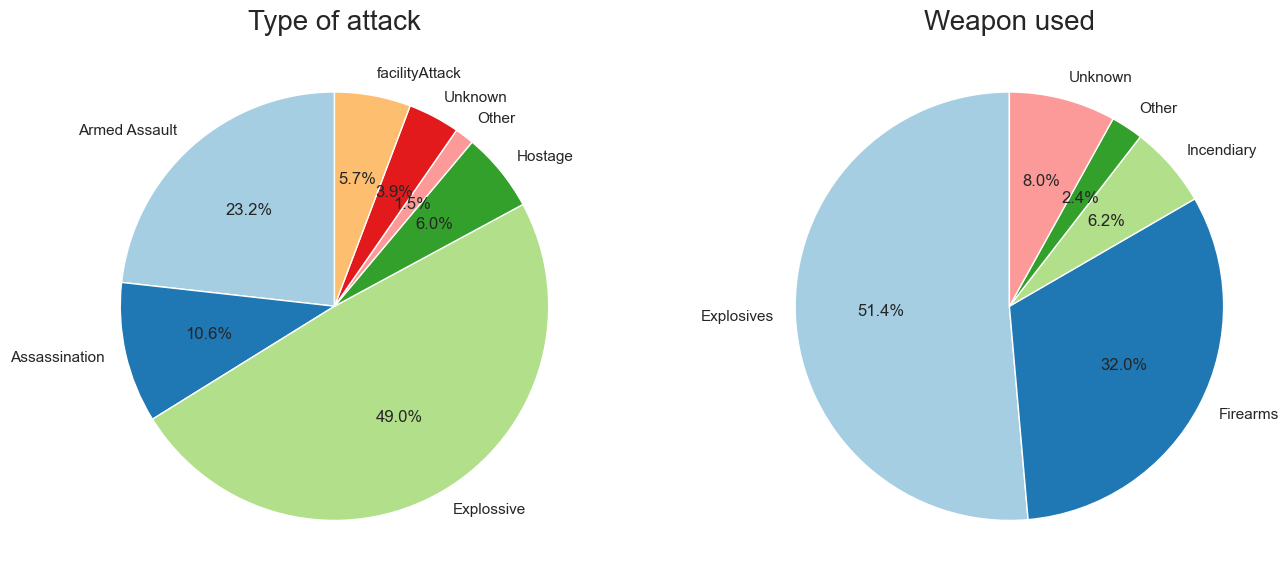

In [86]:
# Creating a figure with two subplots for attack type and weapons used
type_of_attack = data.groupby(data["attacktype1_txt"])["nkill"].count()
weapon_used = data.groupby(data["weaptype1_txt"])["nkill"].count()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)


axes[0].pie(type_of_attack, labels=type_of_attack.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('Type of attack', fontsize=20)


axes[1].pie(weapon_used, labels=weapon_used.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title('Weapon used', fontsize=20)


plt.tight_layout()
plt.show()

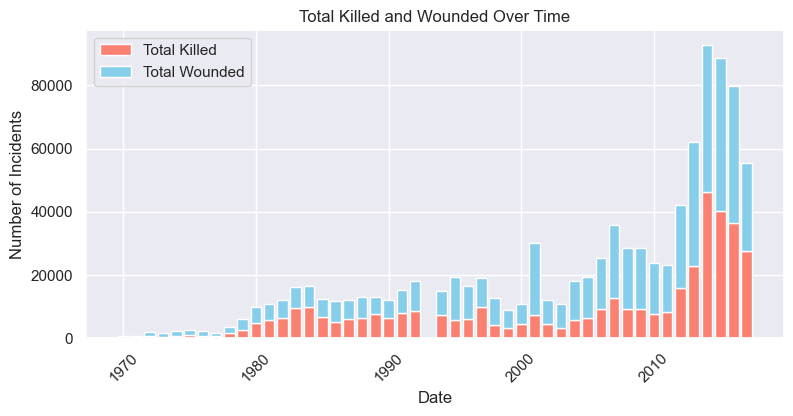

In [137]:
grouped_data_by_date = data.groupby(data['date'].dt.year)[['nkill', 'nwound']].sum()
# Creating a figure and axis
fig, ax = plt.subplots(figsize=(9, 4))

# Plotting the sum of 'nkill' 
ax.bar(grouped_data_by_date.index, grouped_data_by_date['nkill'], label='Total Killed', color='salmon')

# Plotting the sum of 'nwound' 
ax.bar(grouped_data_by_date.index, grouped_data_by_date['nwound'], bottom=grouped_data_by_date['nkill'], label='Total Wounded', color='skyblue')

# Adding labels and title
ax.set_ylabel('Number of Incidents')
ax.set_xlabel('Date')
ax.set_title('Total Killed and Wounded Over Time')
ax.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

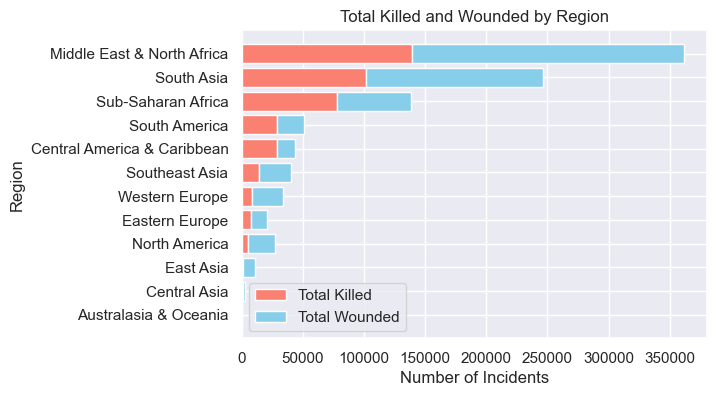

In [91]:
grouped_data_region = data.groupby(data['region_txt'])[['nkill', 'nwound']].sum().sort_values(by="nkill")

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plotting the sum of 'nkill' 
ax.barh(grouped_data_region.index, grouped_data_region['nkill'], label='Total Killed', color='salmon')

# Plotting the sum of 'nwound' 
ax.barh(grouped_data_region.index, grouped_data_region['nwound'], left=grouped_data_region['nkill'], label='Total Wounded', color='skyblue')

# Adding labels and title
ax.set_xlabel('Number of Incidents')
ax.set_ylabel('Region')
ax.set_title('Total Killed and Wounded by Region')
ax.legend()

# Display the plot
plt.show()

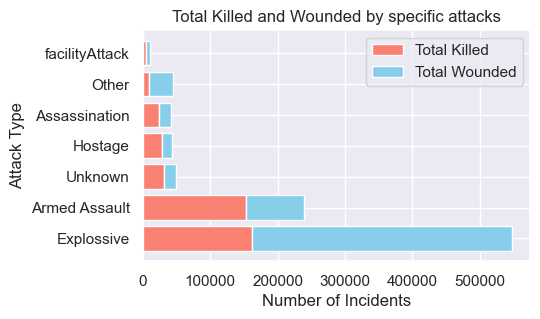

In [116]:
grouped_data_attack = data.groupby(data['attacktype1_txt'])[['nkill', 'nwound']].sum().sort_values(by="nkill", ascending=False)
# Creating a figure and axis
fig, ax = plt.subplots(figsize=(5, 3))

# Plotting the sum of 'nkill' 
ax.barh(grouped_data_attack.index, grouped_data_attack['nkill'], label='Total Killed', color='salmon')

# Plotting the sum of 'nwound' 
ax.barh(grouped_data_attack.index, grouped_data_attack['nwound'], left=grouped_data_attack['nkill'], label='Total Wounded', color='skyblue')

# Adding labels and title
ax.set_xlabel('Number of Incidents')
ax.set_ylabel('Attack Type')
ax.set_title('Total Killed and Wounded by specific attacks')
ax.legend()

# Display the plot
plt.show()

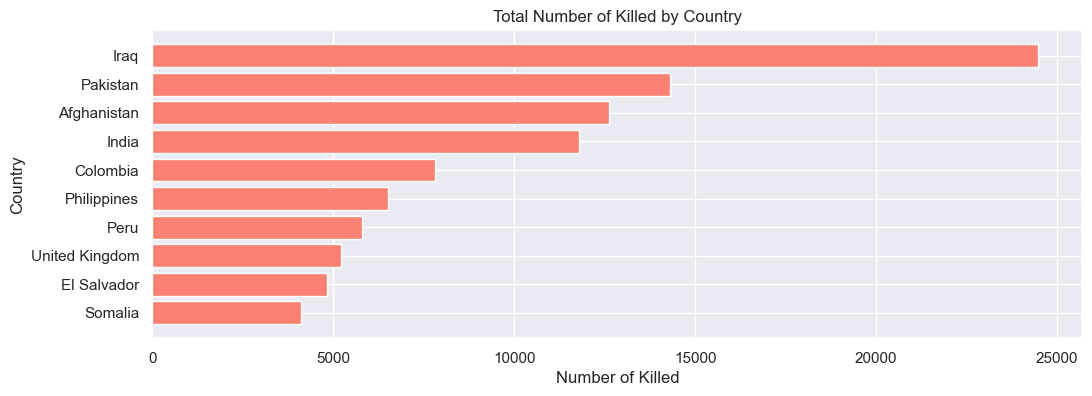

In [124]:
grouped_data_country = data.groupby(data['country_txt'])[["nkill","nwound"]].count().sort_values(by="nkill").tail(10)

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Plotting the sum of 'nkill' for each country
ax.barh(grouped_data_country.index, grouped_data_country["nkill"], label='Total Killed', color='skyblue')

ax.barh(grouped_data_country.index, grouped_data_country["nwound"], label='Total Wounded', color='salmon')

# Adding labels and title
ax.set_xlabel('Number of Killed')
ax.set_ylabel('Country')
ax.set_title('Total Number of Killed by Country')

# Display the plot
plt.show()

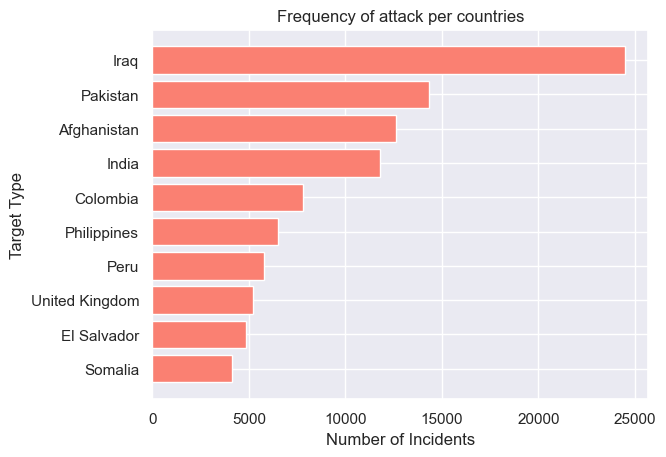

In [123]:
grouped_atack_freq = data.groupby(data['country_txt'])["country_txt"].count().sort_values().tail(10)

plt.barh(grouped_atack_freq.index, grouped_atack_freq, label='Targeted Attack', color='salmon')

# Adding labels and title
plt.xlabel('Number of Incidents')
plt.ylabel('Target Type')
plt.title('Frequency of attack per countries')

# Display the plot
plt.show()

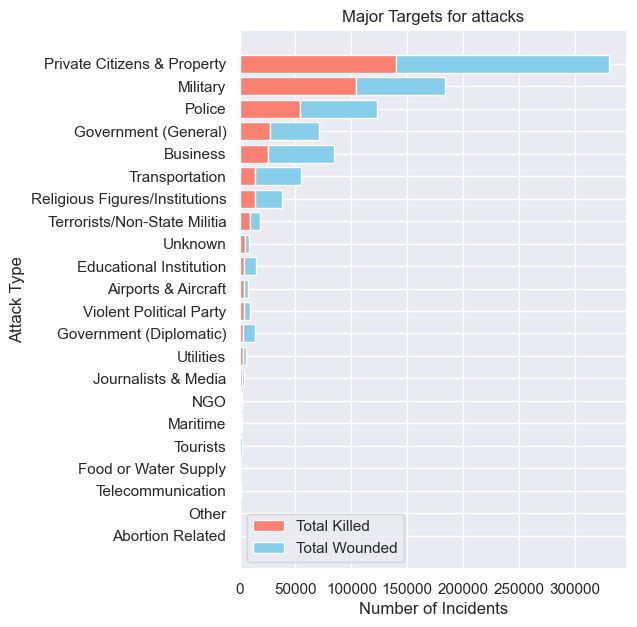

In [125]:
grouped_data_target = data.groupby(data['targtype1_txt'])[['nkill', 'nwound']].sum().sort_values(by="nkill", ascending=True)
# Creating a figure and axis
fig, ax = plt.subplots(figsize=(5, 7))

# Plotting the sum of 'nkill' 
ax.barh(grouped_data_target.index, grouped_data_target['nkill'], label='Total Killed', color='salmon')

# Plotting the sum of 'nwound' 
ax.barh(grouped_data_target.index, grouped_data_target['nwound'], left=grouped_data_target['nkill'], label='Total Wounded', color='skyblue')

# Adding labels and title
ax.set_xlabel('Number of Incidents')
ax.set_ylabel('Attack Type')
ax.set_title('Major Targets for attacks')
ax.legend()

# Display the plot
plt.show()


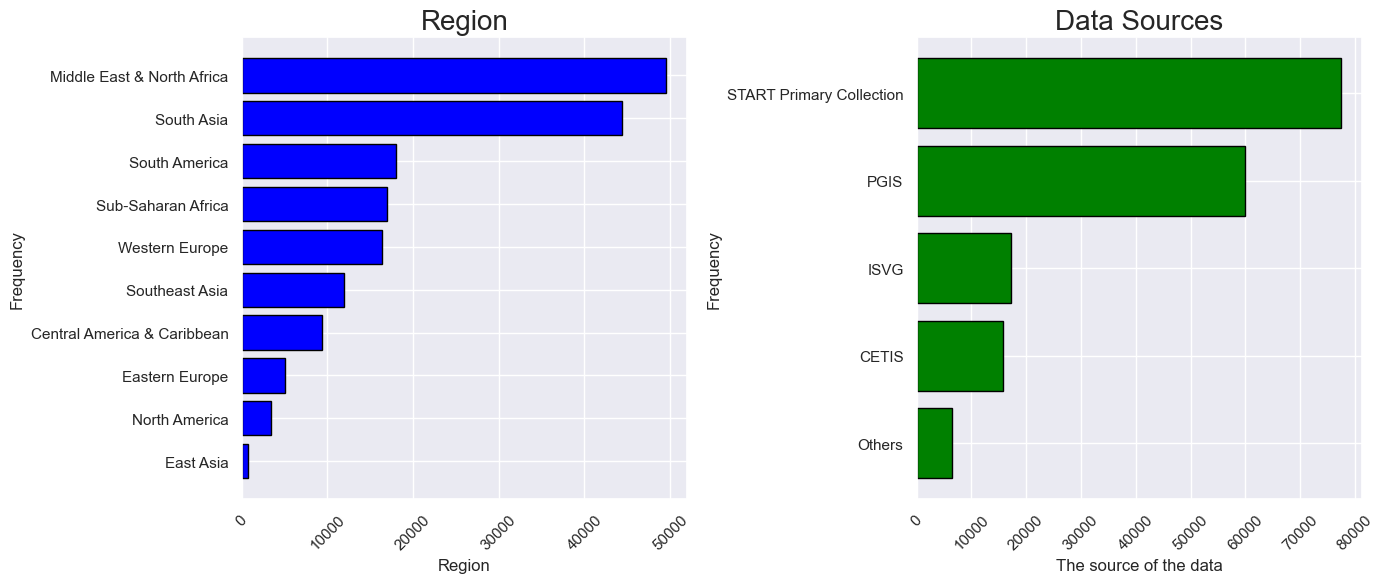

In [126]:
region = data["region_txt"].value_counts().head(10).sort_values(ascending=True)
data_source = data["dbsource"].value_counts().tail(10).sort_values(ascending=True)

# Creating a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=False)

# Ploting Region on the first subplot
axes[0].barh(region.index, region, color='blue', edgecolor='black')
axes[0].set_title('Region', fontsize=20)
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Ploting Data source on the second subplot
axes[1].barh(data_source.index, data_source, color='green', edgecolor='black')
axes[1].set_title('Data Sources', fontsize=20)
axes[1].set_xlabel('The source of the data')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [458]:
kill_per_year = data[["year","nkill"]].groupby(by="year").sum().sort_values(by="nkill", ascending=False)
wound_per_year = data[["year","nwound"]].groupby(by="year").sum().sort_values(by="nwound", ascending=False)

In [459]:
wound_per_year.head()

,nwound
year,
2015,48358
2014,46496
2016,43345
2013,39325
2017,27770


In [460]:
kill_per_year.head()

,nkill
year,
2014,46308
2015,40272
2016,36373
2017,27559
2013,22843


In [461]:
kill_per_year = kill_per_year.reset_index()
wound_per_year = wound_per_year.reset_index()

# Interactive Visualization with Tableau. click the image below 


<a href='https://www.example.com' target='_blank'> ![title](terror.png) </a>